## Classes in Python

- Classes are 'a means of bundling data and functionality together'
- They are a blueprint for an object.
- They are usually written with each word capitalisted e.g. `MyClass`
- Some classes you're probably familiar with are:
```python
numpy.Array
pandas.DataFrame
xarray.DataSet
```

## Simple example

Let's create a class to represent a person and give them some attributes

In [1]:
class Person():
    species = 'homo sapiens'
    number_of_legs = 'two'

In [2]:
print('species = '+ Person.species)  

species = homo sapiens


In [3]:
print('number of legs = '+ Person.number_of_legs)

number of legs = two


### Class instances

- In our blueprint for a person we defined them as a homo sapiens with two legs
- But how about creating a specific person, i.e. creating an instance of a class
- We need to expand the `Person` definition to include initial arguments, for this we add an `__init__` method

In [ ]:
class Person():
    species = 'homo sapiens'
    number_of_legs = 2
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
# create an instance of person called Ben who is 27 years old
person_a = Person(name='Ben', age=27)

In [ ]:
# the general class attributes are still there
print(f'this class is a {person_a.species} with {person_a.number_of_legs} legs')

In [ ]:
# and there are also attributes of the instance added
print(f'this instance is called {person_a.name} and it is {person_a.age} years old')

In [31]:
# create a different person
person_b = Person(name='Dom', age=99)
print(f'this instance is called {person_b.name} and it is {person_b.age} years old')

this class is a homo sapiens with 2 legs
this instance is called Ben and it is 27 years old
this instance is called Dom and it is 99 years old


- `species` and `number_of_legs` are class attributes and `age` are instance attributes
- `self` is a special keyword that represents the instance of a class
- within the class it can be accessed like a dictionary
- it should be passed to each method within a class

### Class methods

let's give our `Person` the ability to speak by adding an `ask` method

In [5]:
class Person():
    species = 'homo sapiens'
    number_of_legs = 2
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def ask(self, question):
        
        if question == 'how are you?':
            print('fine thanks')
        elif question == 'please identify yourself':
            print(f'I am called {self.name} and I am {self.age} years old')

In [6]:
# create an instance of person called Ben who is 27 years old
person = Person(name='Ben', age=27)

In [7]:
# ask it how it is
person.ask('how are you?')

fine thanks


In [8]:
# ask it to identify itself
person.ask('please identify yourself')

I am called Ben and I am 27 years old


Class attributes can be modified within an instance

In [9]:
# lets age it by 4 years, change its name  and ask it to identify itself again
person.age += 4
person.name = 'Margret'
person.ask('please identify yourself')

I am called Claudia and I am 31 years old


## More useful example

Let's say we have a dataset of tree observations and we want to create a `Tree` class to store the data

In [10]:
class Tree():
    def __init__(self, species, height, dbh):
        self.species = species
        self.height = height
        self.dbh = dbh

We create a blueprint for a tree, which is initialised with `species`, `height` and `dbh` (diameter at breast height)

In [11]:
# for example, a large oak tree
tree = Tree(species='oak', height=9.5, dbh=3.2)
print(f'the tree is an {tree.species}, {tree.height}m tall with a diameter of {tree.dbh}m')

the tree is an oak, 9.5m tall with a diameter of 3.2m


- Another way to achieve the same result would be to add a string method (`__str__`) to the class
- A `__str__` method tells the class what to do when it is printed

In [12]:
# currently if you print the class this happens:
print(tree)

In [13]:
class Tree():
    def __init__(self, species, height, dbh):
        self.species = species
        self.height = height
        self.dbh = dbh
        biomass_estimation_table = {'oak':(0.994, -2.944, 1.935, 0.738),
                                    'birch':(0.575, -2.575, 1.827, 0.823)}
        self.biomass_estimators = biomass_estimation_table[self.species]
    
    # add this method
    def __str__(self):
        return f'the tree is an {tree.species}, {tree.height}m tall with a diameter of {tree.dbh}m'

# we have redefined the class so we need to also re-initialise the tree instance
tree = Tree(species='oak', height=9.5, dbh=3.2)
# now if we print it we get:
print(tree)

the tree is an oak, 9.5m tall with a diameter of 3.2m


We can add a method to the function to estimate the tree's biomass

In [14]:
import numpy as np

class Tree():
    
    # add this table of parameters for the calculation
    biomass_estimation_table = {'oak':(0.994, -2.944, 1.935, 0.738),
                                'birch':(0.575, -2.575, 1.827, 0.823),
                                'rowan':(0.823, -2.823, 1.204, 1.121)}
    
    def __init__(self, species, height, dbh):
        self.species = species
        self.height = height
        self.dbh = dbh
        """now when the tree is initialised, the class retrieves the correct parameters for
            biomass estimation depending on species"""
        self.biomass_estimators = self.biomass_estimation_table[self.species]
        # this takes place within __init__

    def __str__(self):
        return f'{self.species} tree of height {self.height}m and dbh {self.dbh}m'

    def estimate_biomass(self):
        #λ × exp(p0 + p1 × lnD + p2 × lnH)
        λ, p0, p1, p2 = self.biomass_estimators
        biomass = λ * np.exp(p0 + p1 * np.log(self.dbh) + p2 * np.log(self.height))
        return biomass

Now we can estimate the biomass (in tonnes) of the oak


In [15]:
tree = Tree(species='oak', height=9.5, dbh=3.2)
print(f'the biomass of the {tree.species} is {tree.estimate_biomass():.2f} tonnes')

the biomass of the oak is 2.62 tonnes


We can add a method to grow the tree (to keep things simple by a % scaling)

```python
def grow(self, percent):
        self.height = self.height * (1 + percent / 100)
        self.dbh = self.dbh * (1 + percent / 100)
```

In [16]:
class Tree():
    
    # add this table of parameters for the calculation
    biomass_estimation_table = {'oak':(0.994, -2.944, 1.935, 0.738),
                                'birch':(0.575, -2.575, 1.827, 0.823),
                                'rowan':(0.823, -2.823, 1.204, 1.121)}
    
    def __init__(self, species, height, dbh):
        self.species = species
        self.height = height
        self.dbh = dbh
        
        self.biomass_estimators = self.biomass_estimation_table[self.species]

    def __str__(self):
        return f'{self.species} tree of height {self.height}m and dbh {self.dbh}m'

    def estimate_biomass(self):
        #λ × exp(p0 + p1 × lnD + p2 × lnH)
        λ, p0, p1, p2 = self.biomass_estimators
        biomass = λ * np.exp(p0 + p1 * np.log(self.dbh) + p2 * np.log(self.height))
        return biomass
    
    def grow(self, percent):
        self.height = self.height * (1 + percent / 100)
        self.dbh = self.dbh * (1 + percent / 100)

In [17]:
# so if we calculate the biomass of our oak again:
tree = Tree(species='oak', height=9.5, dbh=3.2)
print(f'the biomass of the {tree.species} is {tree.estimate_biomass():.2f} tonnes')

the biomass of the oak is 2.62 tonnes


In [18]:
# then we grow the tree by 20% and calculate it again
tree.grow(20)
print(f'the biomass of the {tree.species} is {tree.estimate_biomass():.2f} tonnes')

the biomass of the oak is 4.26 tonnes


We can also create a forest class to contain the trees:

In [19]:
class Forest():
    def __init__(self, trees=[]):
        self.trees = trees
    
    def tree_count(self):
        return len(self.trees)

    # this makes the forest act like a list (i.e. subscriptable)
    def __getitem__(self, item):
        return self.trees[item]

    def add_tree(self, tree):
        self.trees.append(tree)
        
forest = Forest()
print(f'there are {forest.tree_count()} trees in the forest')

there are 0 trees in the forest


`tree_obs.csv` is a csv containing observations from fieldwork

In [20]:
import pandas as pd
tree_obs = pd.read_csv('tree_obs.csv')
tree_obs.head()

,dbh,h,species
0,2.5,5.0,oak
1,1.4,3.1,birch
2,1.8,3.4,birch
3,5.2,8.1,oak
4,2.5,5.2,birch


Iterate over `tree_obs` to add trees to the forest:

In [21]:
for ri, row in tree_obs.iterrows():
    # first make a tree
    tree = Tree(species=row['species'], height=row['h'], dbh=row['dbh'])
    # then add tree to forest
    forest.add_tree(tree)
    
# then count the number of trees in the forest again
print(f'there are {forest.tree_count()} trees in the forest')

there are 8 trees in the forest


In [22]:
class Forest():
    def __init__(self, trees=[]):
        self.trees = trees

    # this makes the forest act like a list (i.e. subscriptable)
    def __getitem__(self, item):
        return self.trees[item]

    def add_tree(self, tree):
        self.trees.append(tree)
        
    def total_biomass(self, species=None):
        if species:
            trees_in = [t for t in self.trees if t.species == species]
        else:
            trees_in = self.trees
        total_biomass = sum([t.estimate_biomass() for t in trees_in])
        return total_biomass
        
forest = Forest()
for ri, row in tree_obs.iterrows():
    # first make a tree
    tree = Tree(species=row['species'], height=row['h'], dbh=row['dbh'])
    # then add tree to forest
    forest.add_tree(tree)

- we can add a new method to `Forest`, `total_biomass` to calculate the total biomass of the forest or a specific species within the forest

```python
def total_biomass(self, species=None):
    
    if species:
        trees_in = [t for t in self.trees if t.species == species]
    else:
        trees_in = self.trees
        
    total_biomass = sum([t.estimate_biomass() for t in trees_in])
    return total_biomass
        
```
- note that the `estimate_biomass` method from the `Tree` class can be called within an instance of `Forest`

In [30]:
print(forest.total_biomass())
print(forest.total_biomass(species='rowan'))
print(forest.total_biomass(species='oak'))
print(forest.total_biomass(species='birch'))

10.379952411708599
0.13381341562692708
8.63593304152186
1.6102059545598113


## Example that I actually use

- I often need to slice and plot `xr.DataArray` classes with a rectangle with north, south, east and westlimits
- Bundling these values up into a class with useful methods avoids repetition of code and is easy to use between multiple scripts

In [24]:
class MapArea:

    def __init__(self, westlimit, eastlimit, northlimit, southlimit):
        self.westlimit = westlimit
        self.eastlimit = eastlimit
        self.northlimit = northlimit
        self.southlimit = southlimit

    def limits(self):
        return self.westlimit, self.southlimit, self.eastlimit, self.northlimit

    def slicer(self):
        ldict = {}
        ldict['latitude'] = slice(self.northlimit, self.southlimit)
        ldict['longitude'] = slice(self.westlimit, self.eastlimit)
        return ldict

    def rectangle(self, colour, alpha=.5):
        rect = mpatches.Rectangle(xy=[self.westlimit, self.southlimit],
                           width=self.eastlimit-self.westlimit,
                           height=self.northlimit-self.southlimit,
                           transform=ccrs.PlateCarree(),
                           facecolor=colour, alpha=alpha)
        return rect

### Usage example

Plotting a map of PM2.5 in an area

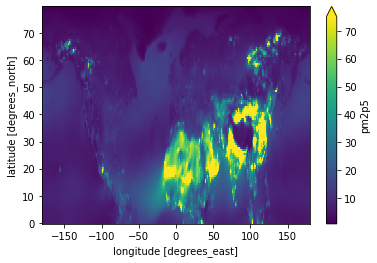

In [25]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = xr.open_dataset('cams_surface_pm25_2019.nc')['pm2p5']
da.plot(vmax=75)

{'latitude': slice(54.4, 17.2, None), 'longitude': slice(71.5, 135.1, None)}


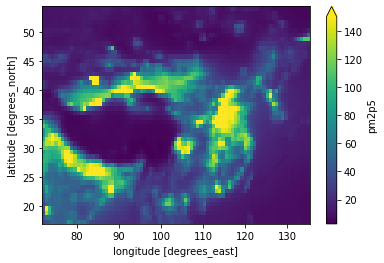

In [26]:
china = MapArea(westlimit=71.5, southlimit=17.2, eastlimit=135.1, northlimit=54.4)
# show what calling the slicer method does
print(china.slicer())
# slice and plot
da.loc[china.slicer()].plot(vmax=150)

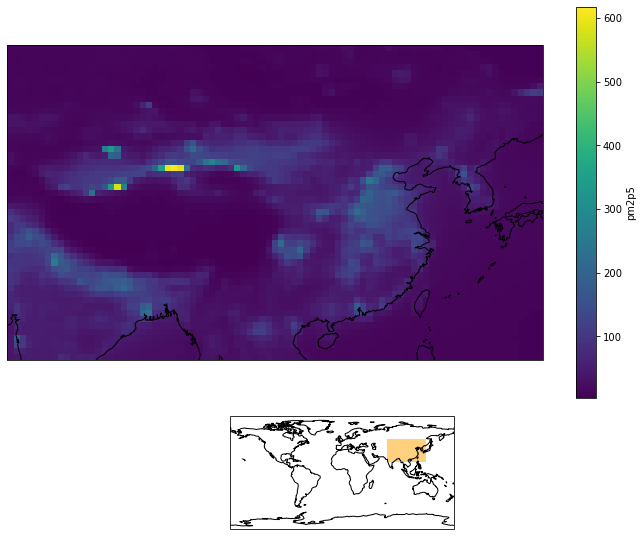

In [32]:
# make a fancier plot
import matplotlib.patches as mpatches
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
da.loc[china.slicer()].plot(ax=ax, cbar_kwargs={'shrink':.6})
ax.coastlines()

ax1 = fig.add_subplot(515,projection=ccrs.PlateCarree())
ax1.add_patch(china.rectangle(colour='orange'))
ax1.coastlines()
ax1.set_extent([-180,180, -90, 90], crs=ccrs.PlateCarree())

## One last example

- Remember that the intended usage of a class is bundling together data and functionality.
- A good use case is to make a class which represents the hazard ratio function from the GEMM (Global Exposure Mortality Model)

To calculate the hazard ratio (additional risk due to PM2.5) you need:
1. a PM2.5 concentration
2. Parameters for the GEMM equation (these change for cause, age group and uncertainty level)
3. the equation itself

The parameters are in a dataframe:

In [28]:
pd.read_csv('gemm_parameters.csv', index_col=[0,1,2]).head()

theta  \
includes_china?              cause                                              age_group           
All-regions, INcluding China Non-accidental function (Non-Communicable + LRI... 25-29      0.1585   
                                                                                30-34      0.1577   
                                                                                35-39      0.1570   
                                                                                40-44      0.1558   
                                                                                45-49      0.1532   

                                                                                           theta_se  \
includes_china?              cause                                              age_group             
All-regions, INcluding China Non-accidental function (Non-Communicable + LRI... 25-29       0.01477   
                                                                                30-34       0.01470   
                                                                                35-39       0.01463   
                                                                                40-44       0.01450   
                                                                                45-49       0.01425   

                                                                                           alpha  \
includes_china?              cause                                              age_group          
All-regions, INcluding China Non-accidental function (Non-Communicable + LRI... 25-29        1.6   
                                                                                30-34        1.6   
                                                                                35-39        1.6   
                                                                                40-44        1.6   
                                                                                45-49        1.6   

                                                                                             mu  \
includes_china?              cause                                              age_group         
All-regions, INcluding China Non-accidental function (Non-Communicable + LRI... 25-29      15.5   
                                                                                30-34      15.5   
                                                                                35-39      15.5   
                                                                                40-44      15.5   
                                                                                45-49      15.5   

                                                                                            tau  
includes_china?              cause                                              age_group        
All-regions, INcluding China Non-accidental function (Non-Communicable + LRI... 25-29      36.8  
                                                                                30-34      36.8  
                                                                                35-39      36.8  
                                                                                40-44      36.8  
                                                                                45-49      36.8

And the equation is in a function like this:

```python
def calculate_hazard_ratio(pm25, alpha, mu, tau, theta):  
        
        # subtract counterfactual
        z = pm25 - 2.4
        # set values less than zero to zero
        z = z.where(z > 0, 0)
        
        gamma = np.log(1 + z / self.alpha) / (1 + np.exp((self.mu - z) / self.tau))
        
        hazard_ratio = np.exp(self.theta * gamma)
        
        return hazard_ratio
```
And would pass the correct parameters into the function each time it was called (on each country)

the script using function
```python

def calculate_hazard_ratio(pm25, alpha, mu, tau, theta):  
    # subtract counterfactual
    z = pm25 - 2.4
    # set values less than zero to zero
    z = z.where(z > 0, 0)
    gamma = np.log(1 + z / alpha) / (1 + np.exp((mu - z) / tau))
    hazard_ratio = np.exp(theta * gamma)
    return hazard_ratio

if __name__ == "__main__":

    # load GEMM params and apply options
    gemm_params = pd.read_csv(config['gemm_params_fpath'], 
                              index_col=[0,1,2])
    gemm_params = gemm_params.sort_index()

    # create iterators
    causes = gemm_params.index.get_level_values('cause').unique()
    age_groups = gemm_params.index.get_level_values('age_group').unique()
    uncertainties = ['lower','mid','upper']

    for cause in causes:
        for age_group in age_groups:
            for uncertainty in uncertainties:
                alpha, mu, tau, theta = gemm_params.loc[cause, age_group, uncertainty]
                for country in countries:
                    hazard_ratio = calculate_hazard_ratio(pm25=pm25, alpha=alpha, mu=mu, tau=tau, theta=theta)
```

the script using a class
```python
class Gemm():
    
    # load GEMM params and apply options
    gemm_params = pd.read_csv(config['gemm_params_fpath'], 
                              index_col=[0,1,2])
    gemm_params = gemm_params.sort_index()
    
    # create iterators for age groups and causes
    causes = gemm_params.index.get_level_values('cause').unique()
    age_groups = gemm_params.index.get_level_values('age_group').unique()
    
    def __init__(self, cause, age_group, uncert, 
                 gemm_params=gemm_params):

        self.theta, self.theta_se, self.alpha, self.mu, self.tau =\
            gemm_params.loc[cause, age_group]
            
        # modify theta if calculating an uncertainty bound
        if uncert == 'lower':
            self.theta_uncert = self.theta - self.theta_se
        elif uncert == 'mid':
            self.theta_uncert = self.theta
        elif uncert == 'upper':
            self.theta_uncert = self.theta + self.theta_se  
        
    def calculate_hazard_ratio(self, pm25):  
        # subtract counterfactual
        z = pm25 - 2.4
        # set values less than zero to zero
        z = z.where(z > 0, 0)
        gamma = np.log(1 + z / self.alpha) / (1 + np.exp((self.mu - z) / self.tau))
        hazard_ratio = np.exp(self.theta * gamma)
        return hazard_ratio

if __name__ == "__main__":
    
    for cause in gemm.causes:
        for age_group in gemm.age_groups:
            for uncertainty in ['lower','mid','upper']:
                gemm = Gemm(cause=cause, age_group=age_group, uncert=uncertainty)
                for country in countries:
                    hazard_ratio = calculate_hazard_ratio(pm25=pm25, alpha=alpha, mu=mu, tau=tau, theta=theta)
```

The code doesn't change much and isn't any shorter as a class. The good thing is that it is all packaged up together. So if another script needed to import the ability to use `Gemm()`, it would only have to import the class, which contains everything, rather than importing the hazard ratio function, loading the required data and making the iterators

```python
from health_functions import Gemm

if __name__ == "__main__":
    
    for cause in gemm.causes:
        for age_group in gemm.age_groups:
            for uncertainty in ['lower','mid','upper']:
                gemm = Gemm(cause=cause, age_group=age_group, uncert=uncertainty)
                for country in countries:
                    hazard_ratio = calculate_hazard_ratio(pm25=pm25, alpha=alpha, mu=mu, tau=tau, theta=theta)
                    
```